# Vermeer style identification
# Data Collection and Exploratory Data Analysis

The problem we are focusing on is the use of deep learning to extract features from the paintings of Johannes Vermeer and other Dutch Baroque painters that can serve us in assessing the provenance of the painting "Girl with a flute", attributed to Vermeer not without controversy. 

The goals of this notebook are:
    
   1. To collect relevant data, namely the paintings of Vermeer and of other painters from the Dutch Baroque. 
   2. To identify relevant feature vectors to our problem and extract them for every painting. Generally we will focus on abstract features that are not obvious at first sight. 
   3. To perform exploratory data analysis on these features.
   
In the feature extraction phase, we will explore two main approaches. On the one hand, we will apply well-known filters for texture analysis and edge detection that are able to capture fine details such as brushstrokes (such as LBP, Sobel filters, etc). On the other hand, we will also explore how to use convolutional neural networks (CNNs) for feature extraction. As opposed to the features extracted by applying the aforementioned filters, the features extracted by CNNs will in general  not be straightforward to interpret due to the black-box nature of neural networks, so we will make use of clustering and visualization techniques to explore their meaning. We will investigate the feature extraction capabilities of a custom CNN and compare with existing ones such as VGG16 and ResNet50. The latter will be used for transfer learning purposes.

## 1. Data Collection and Data Augmentation

### Vermeer's paintings

On the occasion of the exhibition "Closer to Johannes Vermeer" at the Rijksmuseum in Amsterdam, reuniting the whole work of Johannes Vermeer (including "Girl with a flute", whose autorship is under dispute and that we will test our machine learning model on), all these paintings have been displayed online in high resolution on the exhibition's website. This will serve us as our source for data collection to construct the class of Vermeer paintings. Let us display some of the most representative works by Vermeer.

<img src="./examples/5.png" width="600" height="500" alt="description">

<img src="./examples/7.png" width="600" height="500" alt="description">

<img src="./examples/10.png" width="600" height="500" alt="description">

<img src="./examples/19.png" width="600" height="500" alt="description">

<img src="./examples/28.png" width="600" height="500" alt="description">

<img src="./examples/36.png" width="600" height="500" alt="description">

Although an artistic commentary of Vermeer's work is clearly out of our scope, especially since we are going to focus on abstract features, for completeness we will make a few remarks summarizing style and motives. 



The paintings have been stored in the folder ``vermeer/originals``

### "Girl with a flute": a Vermeer?

The painting that will be the subject of our attention is "Girl with a flute". Originally attributed to Vermeer in 1906 by art curator Abraham Bredius (at that time director of the Maurithuis Art Museum in The Hague) upon its discovery as a part of the art collection of Jean de Grez in Brussels, the painting was eventually sold to the American art collector Joseph E. Widener in 1923, who donated it to the National Gallery of Art (Washington D.C.) in 1942. 

<img src="./examples/flute.png" width="600" height="500" alt="description">

Ever since, its provenance has been cautiously disputed. In October 2022, the National Gallery of Art announced that, while the museum was closed during the COVID pandemic, a team of experts had performed a microscopic pigment analysis and advanced imaging techniques concluding that the painting was not a Vermeer. Consequently, they changed the attribution of the painting to "Studio of Johannes Vermeer". Despite this de-attribution announcement, Rijksmuseum curator Pieter Roelofs decided to label the painting as an authentic Vermeer in the Rijksmuseum's 2023 Vermeer exhibition, joining the opposition of several Dutch art academics to the conclusions of the National Gallery of Art study.

In the midst of this controversy, we wonder whether deep learning techniques of feature extraction and classification can shed any light into the debate. While obviously our analysis will not intend to provide a definitive answer, we find interesting to frame the particular question of the provenance of "Girl with a flute" within the larger context of possible uses of convolutional neural networks for artist identification. In other words, this will be an use case for the investigation of what CNNs can "see" and recognize in a painting, beyond features obvious to the human eye. 

For practical purposes, the picture of "Girl with a flute" has also been stored within ``vermeer/originals``.

### Other Dutch Baroque painters

At a later stage we will train a classifier in an attempt to learn Vermeer's style while differentiating it from the style of other Dutch Baroque masters. Thus, we need to form a class of non-Vermeer paintings, collecting works from less-known painters from this period, such as Pieter de Hooch, Carel Fabritius, Gerard Houckgeest or Emmanuel de Witte. We will make notable exclusions in our list of painters based on pictorial motives: for instance, the painter Paulus Potter is a well-known representative of the Delft School but his paintings deal exclusively with nature and animal motives, which are motives alien to Vermeer's. These pictures have been collected from the website WikiArt. We should point out already the similarity in motives and composition that other painters' work bear with respect to Vermeer's works. For instance, let's have a look at the following paintings by Pieter de Hooch: the similarity with Vermeer's style is evident.





<img src="./examples/8.png" width="600" height="500" alt="description">

<img src="./examples/9.png" width="600" height="500" alt="description">

We should keep in mind that the collected pictures of paintings of other Dutch Baroque artists do not have such a high resolution as the ones displayed on Vermeer's exhibition website. This can create a bias in a classification task based on Vermer and non-Vermeer categories, the contraste between the higher and lower resolution of the two categories being learned as an indicator of artist style. This effect can be mitigated by using transfer learning, a technique that we will also explore in this project. Thus, when cropping details of Vermeer paintings, we should find a balance between how much level of detail we want to train on and the avoidance of undesired bias. For a custom CNN, the use of regularization methods may mitigate this effect. 

The set of images by other Dutch painters has been stored in the folder ``./no vermeer``.


### What makes a Vermeer a Vermeer?

Our purpose is to define and extract features that can be used for the identification of the style of Vermeer. The following question immediately arises: what characteristics make a Vermeer painting a Vermeer painting? There is a number of features that in principle may come to our mind: sense of composition, brushtrokes, pigments, color palette, motives, etc. In our deep-learning based analysis, we would like to focus on those fine details that are less obvious to first sight and that cannot be easily reproduced in a forgery or that are not common to an artistic movement. For instance, the sense of composition of a painting is a characteristic that can be explored and judged by visual inspection, and in fact is not unique to a given artist, being influenced by the artistic period. In our case, other painters belonging to the School of Delft share with Vermeer a similar sense of composition in their paintings. 


On the other hand, given the small size of the set of paintings by Vermeer (36 paintings), it would be a standard practice to apply some data augmentation procedure in order to avoid overfitting. One could consider applying the usual techniques for image classification, object detection or face recognition problems, such as lightning variations or geometric transformations. However, the task at hand (artist style identification) presents important differences from these other problems in the sense that the features we are interested in are more abstract, as explained above, and usual data augmentation techniques can be simply introducing redundancies whose usefulness in the training process might be put under question. For instance, whereas rotating or mirroring images is crucial for training CNNs for image recognition or object detection, its usefulness is less clear for the problem of style identification. Realistic style paintings are typically structured in the natural orientation in which we organize ourselves as humans, and so we can argue that many brushstrokes will be predominantly appearing only in a given orientation. As an illustrative example, if chairs are predominantly painted using vertical brushstrokes, it will be rather unnecessary to introduce rotations where chairs appear horizontally, especially if we always input out test images in the natural orientation. In fact, a dimensional reduction analysis after feature extraction via CNNs may produce clusters symmetric with respect to some hyperplace in feature space, reflecting the redundancy that geometric transformations imply for the problem at hand. One may also consider slight variations in lightning, but this is actually not an intrinsic property of a painting itself and so its introduction may seem superficial. While mild adjustments in brightness or contrast can help the model become more robust to variations in lighting conditions under which the artwork might be displayed, in our case we are working with the set of pictures of Vermeer displayed on Rijksmuseum website on the occassion of the "Closer to Johannes Vermeer" exhibition, which we may safely assume were taken under similar lightning conditions and image quality.


Instead, one can consider zooming-in and cropping different parts of the paintings. Besides highlighting specific elements like brushstrokes or textural details, we are more effectively increasing the diversity of our dataset, which reduces the risk of overfitting, particularly if we select the cropped segments according to their relevance. This method also emphasizes learning the artist's style from more abstract characteristics of the painting, instead of more obvious aspects such as overall composition, and the model may even learn to identify concrete elements of the paintings of a specific artist. The downside of this approach is its increased computational load and training time. 

 

### Data augmentation

In this notebook we primarily deal with the paintings by Vermeer in an attempt to extract features in a sort of unsupervised manner: no labels, just focusing on the "true" class and seeing whether CNNs can distill and learn the essence of Vermeer style (expected to be a combination of abstract features). Thus, so far we will only perform data augmentation on the Vermeer paintings. As explained above, we will first extract zoomed-in patches of the paintings containing relevant aspects (faces, hands, clothes, etc) and then crop all the images to squared size. This not only allows to produce small variations around a given picture (imitating the natural presence of small variations around datapoints in datasets) but also will be crucial for the preprocessing part later on, as CNNs are typically fed with square-sized input images. At this point we will not introduce brightness or contrast modifications, as we are assuming that all the pictures of Vermeer paintings (including "Girl with a flute") were taken under the same lightning conditions, and at the moment we are only aiming at extracting characteristic features solely from the Vermeer paintings, without comparison with other painters. 


The set of images including details has been stored in the folder ``./vermeer/details``.

The following function reads the images on a given folder, crops by sweeping over the image a square whose side has the length of the shortest side of the picture at hand, and saves them into a given folder destination. 

In [1]:
from PIL import Image
import os

def sweep_square_and_crop(folder_path, output_folder, step_size=200):
    """
    Sweep a square over each image and crop it to produce multiple square images.

    Args:
    folder_path (str): Path to the folder containing images.
    output_folder (str): Path to the folder where the squared images will be saved.
    step_size (int): The step size for sweeping the square over the image. Fixed to 200 steps by default.

    Returns:
    None
    """
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            image_path = os.path.join(folder_path, filename)
            with Image.open(image_path) as img:
                # Determine the size of the square (minimum of width and height of the image)
                square_size = min(img.size)

                for x in range(0, img.width - square_size + 1, step_size):
                    for y in range(0, img.height - square_size + 1, step_size):
                        # Define the crop box
                        box = (x, y, x + square_size, y + square_size)
                        cropped_image = img.crop(box)

                        # Construct the output filename
                        output_filename = f"{os.path.splitext(filename)[0]}_{x}_{y}.png"
                        # Save the cropped image
                        cropped_image.save(os.path.join(output_folder, output_filename))

We will use it to read and crop the images in ``./vermeer/details`` and store the cropped images in ``./vermeer/cropped``.

In [2]:
sweep_square_and_crop('./vermeer/details', './vermeer/cropped', step_size=200)

It is useful to illustrate this step with an example. For the painting "A girl asleep", some of the cropped images we are producing are the following:

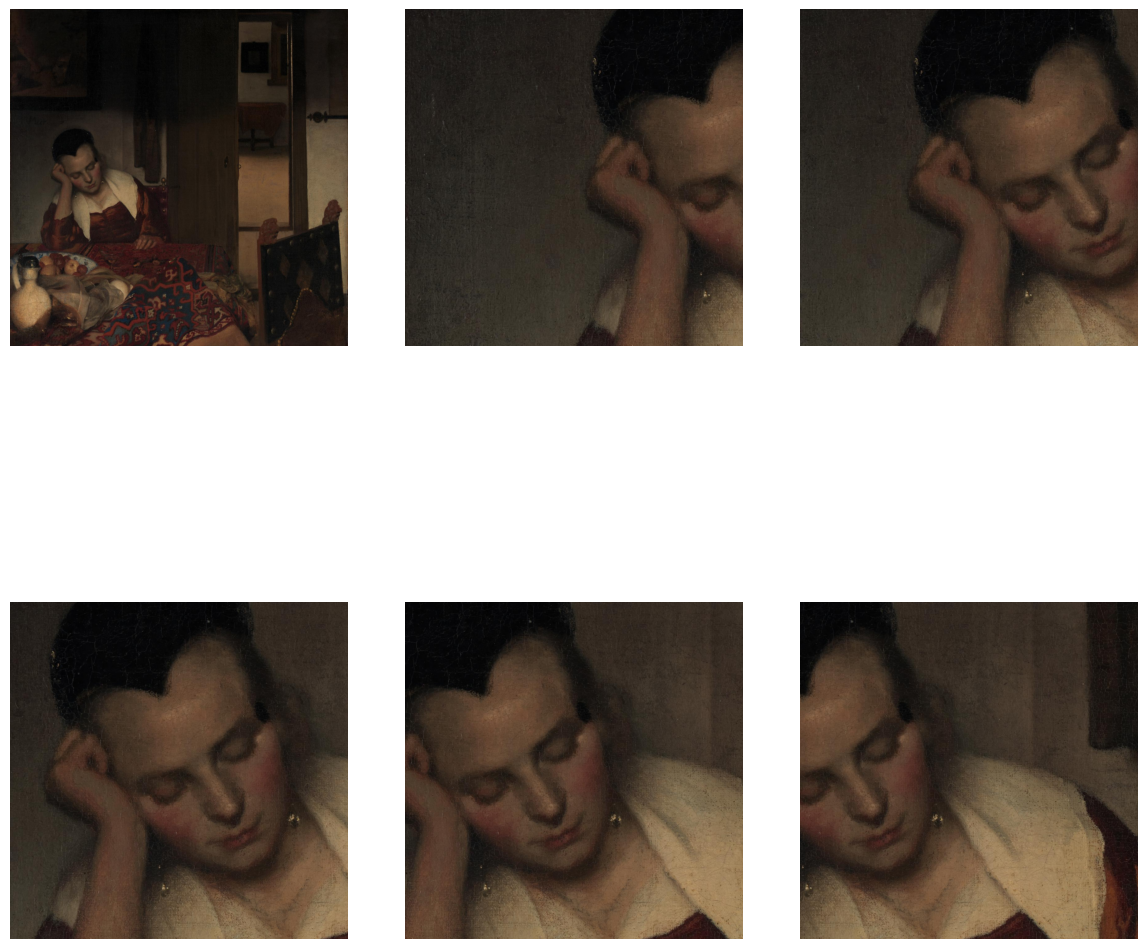

In [9]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Folder containing images
image_folder = './3_0_0'

# Specify the order of images
ordered_filenames = ['3_0_0.png', '3_0_0-2.png', '3_0_0-3.png', '3_0_0-4.png', '3_0_0-5.png', '3_0_0-6.png']  # Replace with your filenames

# Load images in the specified order
image_paths = [os.path.join(image_folder, f) for f in ordered_filenames]
images = [mpimg.imread(path) for path in image_paths]

# Number of images
num_images = len(images)

# Create a grid for displaying images
cols = 3  # Define number of columns
rows = -(-num_images // cols)  # Ceiling division to get number of rows

fig, axarr = plt.subplots(rows, cols, figsize=(12, 12))  # Adjust the figure size
fig.tight_layout()

# Display each image in a subplot
for i in range(rows * cols):
    ax = axarr[i // cols, i % cols] if rows > 1 else axarr[i % cols]
    ax.axis('off')  # Hide axes
    if i < num_images:
        ax.imshow(images[i])
    else:
        ax.set_visible(False)  # Hide empty subplots

plt.show()


## 2. Feature extraction

It is time to perform feature extraction on our set of Vermeer paintings and the details extracted from them. Recall that we are interested in extracting features that are not obvious to a naked eye, but rather subtle features carrying information about brushstrokes, textures, characteristic details in depicting specific items or anatomy, etc. For this purpose, we will take two approaches:

1. Use a custom autoencoder to learn features from Vermeer paintings. The resulting features will typically be rather abstract and not easy to interpret. We will complement them with features obtained by the application of well-known filters in texture analysis and edge detection, which are relevant for brushstroke analysis and style recognition.


2. Transfer learning: use pre-trained CNNs for feature extraction. These networks are way deeper than what we can afford with our limited computer resources, and have been trained for computer vision tasks such as image classification or object detection, with an excellent performance. Although our task at hand is different from the ones these networks have been trained for, the power of these networks and the level of detail they can reach lead us to believe that by using the pre-trained weights one can still extract relevant information for style identification. This technique is called transfer learning. Precisely due to the high level of detail that these networks can capture, one may argue that it will not be necessary to complement the extracted features with texture and edge detection filters. We will use VGG16, VGG19 and ResNet50 pre-trained networks.

### Image preprocessing

The first step for performing feature extraction is to preprocess our set of images. CNNs typically require square-sized images as input, and the pre-trained models VGG and ResNet50 make use of the specific format 224x224. Since we are primarily interested in the fine details of the paintings and not in the composition, we will crop the images in squared-sized ones and resize them to 224x224 pixels. Furthermore, for more efficient processing we will normalize the pixel values to the range [0,1} dividing by 255: this is a common practice in data preprocessing to bring different features to a similar scale, making the data more manageable and stable for computation. In particular, neural networks perform better with input data scaled to a smaller range. This is due to the nature of the activation functions used in the network, like Sigmoid or Tanh, which squish their input into a small range. If the input data have large values (like typical pixel values of 0-255), the activations can become saturated, making the learning slow and less effective.

For this purpose, let us define the function ``resize_and_normalize`` that first resizes the images contained in the folder ``input_folder`` to 224x224 pixels and then normalizes pixel values dividing by 255.

In [10]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def resize_and_normalize(input_folder, output_folder, size=(224, 224)):
    """
    Resize images to the given size, normalize pixel values, and save them as
    numpy arrays in a separate folder.

    Args:
    - input_folder (str): Folder containing the original images.
    - output_folder (str): Folder where numpy arrays of processed images will be saved.
    - size (tuple): New size of the images. Default is (224, 224).
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        
    # Resize images
    for filename in os.listdir(input_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(input_folder, filename)
            img = load_img(img_path, target_size=size)
            img_array = img_to_array(img)

            # Normalize pixel values to [0, 1]
            img_array_normalized = img_array / 255.0

            # Save the numpy array
            array_filename = os.path.splitext(filename)[0] + '.npy'
            save_path = os.path.join(output_folder, array_filename)
            np.save(save_path, img_array_normalized)

We can now apply this function to the images in ``./vermeer/cropped`` and save the preprocessed images in ``./vermeer/preprocessed``. Note that the format of the output images will be in ``.npy``.

In [12]:
# Usage
source_folder = './vermeer/cropped'
destination_folder = './vermeer/preprocessed'
resize_and_normalize(source_folder, destination_folder)

### Texture analysis and edge detection

Two critical aspects that significantly contribute to an artist's unique style are texture and edge details. Texture encompasses the surface quality and visual patterns in the artwork, often reflecting the artist's technique and choice of canvas material. We will utilize texture analysis filters to extract these features, capturing the unique textural signatures that artists leave behind in their works. On the other hand, edges define the shapes, outlines, and distinct areas within a piece, providing structure and depth. Identifying the edges in artworks is crucial for understanding an artist's drawing style, including the use of lines, contours, and the delineation of forms. Edge detection filters will be employed to highlight these critical features. Effectively analyzing all these elements can offer profound insights into the stylistic signatures that differentiate one artist from another.

We will use various filters, such as Local Binary Patterns (LBP) for texture analysis and Scharr filter for edge detection, to preprocess the images. These filters will help in extracting meaningful features that are representative of the artists' styles. 

Recall that our goal is to integrate the extracted features from texture analysis and edge detection with more abstract features extracted froma  custom CNN to form a comprehensive feature set, which will be used to train and validate our classification models in the next notebook. 

#### Local Binary Patterns

Local Binary Patterns (LBP) is a simple yet effective texture descriptor used in image processing and computer vision. LBP operates on grayscale images and works by comparing each pixel with its surrounding pixels. The process is as follows:

   1. Neighborhood examination: for each pixel in the image, LBP looks at its neighbors in a defined square around it.
   2. Binary thresholding: each neighbor's intensity is compared to the intensity of the central pixel. If the neighbor's intensity is greater than or equal to the central pixel's intensity, it is marked as 1; otherwise, it's marked as 0.
   3. Binary pattern creation: these binary values are then concatenated into a binary string.
   4. Pattern conversion to decimal: this binary string is converted into a decimal number, which becomes the new value of the central pixel in the LBP image.

This process results in a new image where the pixel values represent the texture patterns around each pixel.

LBP is widely used for local texture analysis, face recognition (it can capture fine details in facial textures), image segmentation (it can be used to segment images based on texture) and motion analysis (concretely, detecting changes in textures in video data). 

LBP can be particularly useful for extracting features related to artist style identification. LBP is excels at capturing local texture patterns, which can be crucial in identifying an artist's unique brushwork or canvas texture. It is robust to changes in Lighting, which is important in analyzing artworks that may be photographed under varying lighting conditions. Furthermore, LBP is computationally efficient, making it suitable for processing large datasets of artworks. 

One can form feature vectors from LBP images and use them as additional inputs to deep learning models. The feature vector for LBP is typically formed by creating a histogram of the LBP values computed from an image. This histogram effectively captures the distribution of different textures in the image. The x-axis of the histogram represents possible LBP values (which can range from 0 to the maximum LBP value, depending on the number of neighbors considered), and the y-axis represents the frequency of each LBP value. It is a common practice to normalize the histogram dividing each bin by the total number of pixels in the image: this turns the histogram into a probability distribution of LBP values The normalized histogram itself serves as the feature vector: each bin of the histogram represents a feature, and the value in each bin represents the frequency (or probability) of that particular LBP pattern occurring in the image.


In order to implement LBP, we define the series of functions ``apply_lbp``, ``compute_lbp_histogram`` and ``extract_features``. These functions apply the LBP algorithm to an image, compute the corresponding histogram of a LBP image, and extract the feature vector and save the LBP images to a given folder, respectively.

In [13]:
from skimage.color import rgb2gray

def apply_lbp(image):
    """ Apply Local Binary Pattern transformation to an image. Convert to grayscale if it's a color image. """
    if len(image.shape) > 2 and image.shape[2] == 3:
        image = rgb2gray(image)
    lbp_image = np.zeros_like(image, dtype=np.uint8)
    neighbor = 3
    for h in range(0, image.shape[0] - neighbor):
        for w in range(0, image.shape[1] - neighbor):
            center = image[h + 1, w + 1]
            binary_str = ''
            for n in range(neighbor):
                for m in range(neighbor):
                    if image[h + n, w + m] >= center:
                        binary_str += '1'
                    else:
                        binary_str += '0'
            lbp_value = int(binary_str, 2)
            lbp_image[h + 1, w + 1] = np.uint8(lbp_value % 256)
    return lbp_image

def compute_lbp_histogram(image):
    """ Compute histogram of LBP image as feature vector. """
    lbp_image = apply_lbp(image)
    hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(257), range=(0, 256))
    hist = hist.astype("float32")
    hist /= (hist.sum() + 1e-6)
    return hist

def extract_features(input_folder):
    """ Extract LBP features from all .npy images in the input folder. """
    features = []
    for filename in os.listdir(input_folder):
        if filename.endswith(".npy"):
            image_path = os.path.join(input_folder, filename)
            image = np.load(image_path)
            feature_vector = compute_lbp_histogram(image)
            features.append(feature_vector)
    return np.array(features)




We will now apply LBP to the images in ``./vermeer/preprocessed``, saving the features vectors to the file ``lbp_features.npy``- 

In [14]:
# Folder paths
input_image_folder = './vermeer/preprocessed'
lbp_features = extract_features(input_image_folder)

# Save the feature vectors to a file
output_file = './vermeer/lbp_features.npy'
np.save(output_file, lbp_features)

For memory efficiency, we have stored the output LBP images and the corresponding feature vectors in ``.npy`` format. For illustrative purposes, we can select a few LBP images and convert them to ``.png`` format. 

<img src="./filters/comp_lbp1.png" width="600" height="500" alt="description">
<img src="./filters/comp_lbp2.png" width="600" height="500" alt="description">
<img src="./filters/comp_lbp3.png" width="600" height="500" alt="description">
<img src="./filters/comp_lbp4.png" width="600" height="500" alt="description">

#### Scharr filter

The Scharr filter is an edge-detection filter that is used to bring out fine details in images. It is an improvement of the so-called Sobel filter but uses a different convolution kernel that emphasizes better accuracy for edge orientation. The Scharr filter is designed to give a more isotropic response to edges, meaning it is more uniform in its response to edges regardless of their orientation in the image.

The Scharr filter operates by convolving the image with two 3x3 kernels (one for horizontal changes, and one for vertical). These kernels are designed to respond maximally to edges running vertically and horizontally relative to the pixel grid, one kernel for each of the two perpendicular orientations. The result of the convolution with the horizontal kernel gives the gradient of the image at that pixel in the x-direction, i.e., the rate of change of the pixel intensity in the horizontal direction. Similarly, the result from the vertical kernel gives the gradient in the y-direction.


The Scharr filter is primarily used for edge detection: it identifies the boundaries and edges of objects within an image by highlighting regions where there are abrupt changes in intensity or color. It can also be used to calculates the gradient of image intensity at each pixel, providing the direction and strength of edges.

In the context of artist style identification, especially when using deep learning, the Scharr filter can be useful in several ways:

   1. Highlighting brushwork: it can enhance the visibility of brush strokes and textures that are characteristic of an artist's style.
   2. Capturing fine details: due to its sensitivity and isotropic response, it can capture fine details in paintings that might be indicative of a specific artistic technique or period.

The output of the Scharr filter can be used as a preprocessed input for Convolutional Neural Networks (CNNs), helping the network to focus on important stylistic features like edges and contours. Concretely, after applying Scharr filter, we build a histogram of gradient orientations, which can serve as a feature vector once normalized. 

We shall now define functions that apply the Schnarr filter to images in a given folder and that extract feature vectors from these filtered images by computing a histogram.

In [15]:
import cv2

def apply_scharr_filter(image):
    """ Apply Scharr filter to an image to extract edge features. """
    scharr_x = cv2.Scharr(image, cv2.CV_64F, 1, 0)
    scharr_y = cv2.Scharr(image, cv2.CV_64F, 0, 1)
    magnitude = np.sqrt(scharr_x**2 + scharr_y**2)
    return magnitude

def extract_features_scharr(input_folder, num_bins=32):
    """ Extract edge features using Scharr filter from all .npy images in the input folder. """
    features = []

    for filename in os.listdir(input_folder):
        if filename.endswith(".npy"):
            image_path = os.path.join(input_folder, filename)
            image = np.load(image_path)

            if image is None:
                print(f"Failed to load image: {filename}")
                continue

            filtered_image = apply_scharr_filter(image)

            # Create a histogram of the edge magnitudes
            hist, _ = np.histogram(filtered_image, bins=num_bins, range=(0, filtered_image.max()))
            hist = hist.astype("float32")
            hist /= (hist.sum() + 1e-6)  # Normalize the histogram

            features.append(hist)

    return np.array(features)

# Folder paths
input_image_folder = './vermeer/preprocessed'
scharr_features = extract_features_scharr(input_image_folder)

# Save the feature vectors to a file
output_file = './vermeer/scharr_features.npy'
np.save(output_file, scharr_features)


Again, it is illustrative to visualize the result of applying the Schnarr filter to a few images.

<img src="./filters/comp_scharr1.png" width="600" height="500" alt="description">
<img src="./filters/comp_scharr2.png" width="600" height="500" alt="description">
<img src="./filters/comp_scharr3.png" width="600" height="500" alt="description">
<img src="./filters/comp_scharr4.png" width="600" height="500" alt="description">

### Custom autoencoder for feature extraction

The features defined above have a concrete meaning in texture analysis and edge detection. Another way of obtaining features from a given image is to apply convolutional neural networks. CNNs have proven to be highly effective in feature extraction due to their ability to learn hierarchical representations: lower layers capture basic details, and as the data progresses through the layers, more abstract and complex features are extracted. 

In order to perform feature extraction using a CNN, some form of training is necessary to adjust the parameters of the network so it approrpiately extract the features we are interested in. Obviously this is not a straightfoward task and requires a lot of experimentation with network architecture, training process, hyperparameter values, etc. 

In this section we are going to train a custom autoencoder to learn features from Vermeer paintings in an unsupervised way. The encoder will then be used for feature extraction at a later stage for a classification task. The idea is to first encode an image, decode it and then compute a loss function that determines the error between the original and the reconstructed image. We will use the mean squared error as our loss function. The training process attemps to minimizes the loss on the training set. In other words, we are compressing a given set of images in order to extract relevant features, and then decompressing them and compare how well the result compares with the original, adapting the parameters of the networks in the training process for closest resemblance. 


Here we will use a relatively simple autoencoder of four layers. The encoder will take an input image with the specified shape 224x224. The encoder consists of several convolutional layers (Conv2D), each of them applies a set of learnable filters to the input, capturing various features of the image. The number of filters increases with each layer (32, 64, 128, and finally 256), allowing the network to capture more complex features at each step. Each convolutional layer uses the ReLU activation function, which helps introducing non-linearity into the model, allowing it to learn more complex patterns. After each convolutional layer, a max-pooling layer (MaxPooling2D) reduces the spatial dimensions (height and width) of the output from the previous layer. This downsampling helps reduce the computational complexity and the number of parameters, making the network more robust to variations in the input image. After the final pooling layer, the multi-dimensional output is flattened into a one-dimensional array (flattened). A dense layer (Dense) forms the bottleneck of the autoencoder. This layer has fewer neurons (256 in this case) and represents a compressed knowledge representation of the input data.

The decoder starts with a dense layer that expands the bottleneck features back to a suitable number of units. It is then reshaped into a multi-dimensional array (Reshape) that mirrors the dimensionality at a corresponding stage in the encoder. The decoder uses transposed convolutional layers (Conv2DTranspose) to perform the inverse operation of the convolutional layers in the encoder. This gradually reconstructs the image from the bottleneck representation. Each transposed convolutional layer is followed by an upsampling layer (UpSampling2D), which increases the spatial dimensions (height and width) of the output. The final layer of the decoder is another transposed convolutional layer with a sigmoid activation function. It reconstructs the image to its original dimensions and the number of channels (3 in this case, assuming RGB images).

For training purposes, we will split our image dataset into a training and validation set. The purpose of the latter is the following: after the model has been trained on the entire training dataset (i.e., at the end of the epoch), it is then evaluated on the validation set. This is meant to simulate unseen data. The model's performance is assessed by computing the loss on the validation set: the validation loss. It measures how well the model generalizes to data it has not seen during training, and can indicate whether overfitting or underfitting are occurring. 



In [22]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, Reshape, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Define hyperparameters
input_shape = (224, 224, 3)
batch_size = 8
epochs = 25
learning_rate = 0.001

# Set the directory containing individual .npy files for each image
images_dir = './vermeer/preprocessed' 

# Loading the images from .npy files
images = []
for filename in os.listdir(images_dir):
    if filename.endswith(".npy"):
        img_path = os.path.join(images_dir, filename)
        img = np.load(img_path)
        images.append(img)

images = np.array(images)

# Split data into training and validation sets
train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)



In [6]:

# Build the autoencoder model
encoder_input = Input(shape=input_shape, name='input_image')

encoder = Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)
encoder = MaxPooling2D((2, 2), padding='same')(encoder)

encoder = Conv2D(64, (3, 3), activation='relu', padding='same')(encoder)
encoder = MaxPooling2D((2, 2), padding='same')(encoder)

encoder = Conv2D(128, (3, 3), activation='relu', padding='same')(encoder)
encoder = MaxPooling2D((2, 2), padding='same')(encoder)

# New Conv2D layer with 256 units
encoder = Conv2D(256, (3, 3), activation='relu', padding='same')(encoder)
encoder = MaxPooling2D((2, 2), padding='same')(encoder)

flattened = Flatten()(encoder)
bottleneck = Dense(612, activation='relu')(flattened)

# Decoder
decoder = Dense(14 * 14 * 256, activation='relu')(bottleneck)  # Adjusted for new layer size
decoder = Reshape((14, 14, 256))(decoder)

decoder = Conv2DTranspose(256, (3, 3), activation='relu', padding='same')(decoder)
decoder = UpSampling2D((2, 2))(decoder)

decoder = Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(decoder)
decoder = UpSampling2D((2, 2))(decoder)

decoder = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(decoder)
decoder = UpSampling2D((2, 2))(decoder)

decoder = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(decoder)
decoder = UpSampling2D((2, 2))(decoder)

decoder_output = Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(decoder)

# Create the autoencoder model
autoencoder = Model(inputs=encoder_input, outputs=decoder_output)

# Compile the autoencoder
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')

# Train the autoencoder on original training images
autoencoder.fit(train_images, train_images,
                batch_size=batch_size,
                validation_data=(val_images, val_images),
                epochs=epochs)




Epoch 1/25

76/76 [==============================] - 119s 2s/step - loss: 0.0398 - val_loss: 0.0263
Epoch 2/25
76/76 [==============================] - 113s 1s/step - loss: 0.0222 - val_loss: 0.0212
Epoch 3/25
76/76 [==============================] - 3787s 50s/step - loss: 0.0181 - val_loss: 0.0187
Epoch 4/25
76/76 [==============================] - 117s 2s/step - loss: 0.0158 - val_loss: 0.0168
Epoch 5/25
76/76 [==============================] - 123s 2s/step - loss: 0.0148 - val_loss: 0.0168
Epoch 6/25
76/76 [==============================] - 118s 2s/step - loss: 0.0138 - val_loss: 0.0152
Epoch 7/25
76/76 [==============================] - 110s 1s/step - loss: 0.0130 - val_loss: 0.0148
Epoch 8/25
76/76 [==============================] - 121s 2s/step - loss: 0.0127 - val_loss: 0.0145
Epoch 9/25
76/76 [==============================] - 116s 2s/step - loss: 0.0121 - val_loss: 0.0149
Epoch 10/25
76/76 [==============================] - 124s 2s/step - loss: 0.0121 - val_loss: 0.0149
Epoc

Note that we have not included regularization, which may be crucial in order to avoid overfitting.

The encoder part of the autoencoder is a CNN that has been trained to learn features of Vermeer paintings. Now we want to perform some sort of visualization of the features that the encoer has learned. Concretely, we shall perform t-SNE and PCA dimensional reduction to 2D and plot the result for cluster search. We will input to our CNN the validation set along with a few paintings from other painters, just to check where they lay in the plot in comparison with Vermeer paintings. 

First we need to crop and preprocess the pictures of other painters, following the same steps as earlier.

In [16]:
sweep_square_and_crop('./others', './others/cropped', step_size=200) 

In [17]:
source_folder = './others/cropped'
destination_folder = './others/preprocessed'
resize_and_normalize(source_folder, destination_folder)

In [18]:
# Set the directory containing individual .npy files for each image
images_dir = './others/preprocessed' 

# Loading the images from .npy files
others = []
for filename in os.listdir(images_dir):
    if filename.endswith(".npy"):
        img_path = os.path.join(images_dir, filename)
        img = np.load(img_path)
        others.append(img)

others = np.array(others)

Now we combine the preprocessed images from the validation set and from other painters in a single variable ``combined``. 

In [26]:
combined = np.concatenate((images, others), axis=0)

We need to extract the encoder part from the trained autoencoder

In [52]:
# Define the encoder model from the input to the bottleneck
encoder_model = Model(inputs=encoder_input, outputs=bottleneck)

and now we input the combined set of images to our encoder, which output the ``features`` we will study.

In [82]:
features = encoder_model.predict(combined)

24/24 [==============================] - 11s 433ms/step


In [83]:
# Flatten features
features_custom_model_flat = [f.reshape(-1) for f in features]
# Stack features
features_custom_model_matrix = np.vstack(features_custom_model_flat)

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
features_custom_model = scaler.fit_transform(features_custom_model_matrix)

In [84]:
# Apply t-SNE transformation
tsne = TSNE(n_components=2, random_state=8)

features_custom_model_2d = tsne.fit_transform(features_custom_model)

In [85]:
tsne_results = features_custom_model_2d

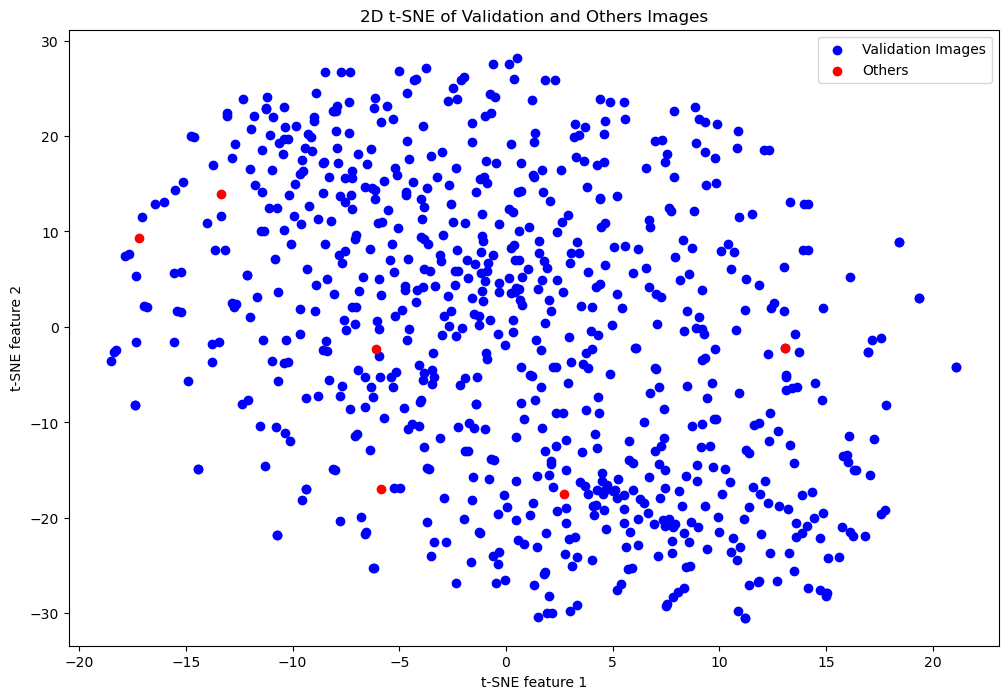

In [86]:
# Separating the two sets of features in the TSNE output

val_tsne = tsne_results[:len(images)]
others_tsne = tsne_results[len(images):]

# Plotting

plt.figure(figsize=(12, 8))
plt.scatter(val_tsne[:, 0], val_tsne[:, 1], c='blue', label='Validation Images')
plt.scatter(others_tsne[:, 0], others_tsne[:, 1], c='red', label='Others')
plt.legend()
plt.title('2D t-SNE of Validation and Others Images')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

### Transfer learning: VGG and ResNet for feature extraction

Transfer learning is a machine learning technique where a model developed for one task is reused as the starting point for a model on a second task. It is a popular approach in deep learning because it can save significant time and resources, as training deep learning models from scratch requires large datasets and substantial computational power.

Transfer learning often involves using a model that has been pre-trained on a large, comprehensive dataset (like ImageNet). These models have already learned a wide range of features that can be useful for many tasks. The idea is to leverage the features learned by the model on one task for other tasks. For example, a model trained on a large dataset of general images will learn features like edges, textures, and basic shapes that are useful for most image recognition tasks. Feature extraction involves using the representations learned by a previous network to extract meaningful features from new samples: one simply adds a new output layer and train this layer on your dataset, while all the other layers remain frozen. Another possibility of to perform fine-tuning, which involves unfreezing the entire model or a part of it and re-training it on the new data. This can lead to even better performance as the model adjusts some of its learned features to better suit the new task.

In this section we will show how to extract features using the pre-trained CNNs VGG16, VGG19 and ResNet50, using their pre-trained weights on the ImageNet dataset. First we have to import the networks and the pre-trained weights.



In [58]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50

vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet50 = ResNet50(weights='imagenet', include_top=False)

We follow similar steps to those for the autoencoder.

In [59]:
features_vgg16 = vgg16.predict(combined)
features_vgg19 = vgg19.predict(combined)
features_resnet50 = resnet50.predict(combined)

24/24 [==============================] - 75s 3s/step


In [60]:
# Flatten features
features_vgg16_flat = [f.reshape(-1) for f in features_vgg16]
features_vgg19_flat = [f.reshape(-1) for f in features_vgg19]
features_resnet50_flat = [f.reshape(-1) for f in features_resnet50]

# Stack features
features_vgg16_matrix = np.vstack(features_vgg16_flat)
features_vgg19_matrix = np.vstack(features_vgg19_flat)
features_resnet50_matrix = np.vstack(features_resnet50_flat)

In [61]:

# Create separate scalers for each feature set
scaler_vgg16 = StandardScaler()
scaler_vgg19 = StandardScaler()
scaler_resnet50 = StandardScaler()

# Standardize each feature set independently
features_vgg16 = scaler_vgg16.fit_transform(features_vgg16_matrix)
features_vgg19 = scaler_vgg19.fit_transform(features_vgg19_matrix)
features_resnet50 = scaler_resnet50.fit_transform(features_resnet50_matrix)


In [65]:
# Apply t-SNE transformation
tsne_vgg16 = TSNE(n_components=2, random_state=8)

tsne_vgg16 = tsne_vgg16.fit_transform(features_vgg16)

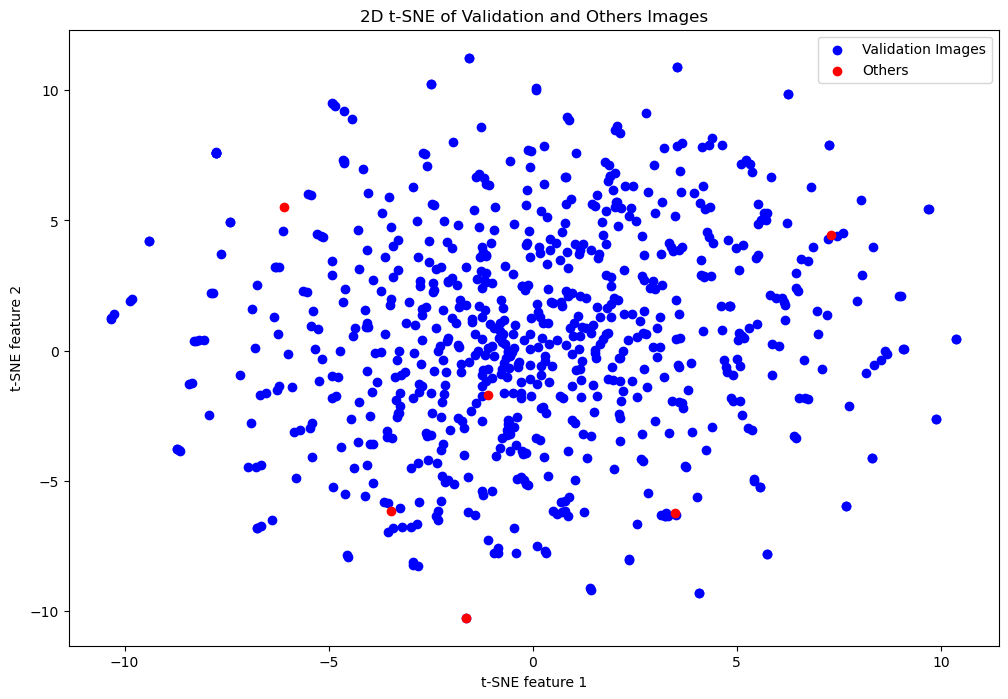

In [69]:
# Separating the two sets of features in the TSNE output

val_tsne_vgg16 = tsne_vgg16[:len(images)]

others_tsne_vgg16 = tsne_vgg16[len(images):]



# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(val_tsne_vgg16[:, 0], val_tsne_vgg16[:, 1], c='blue', label='Validation Images')
plt.scatter(others_tsne_vgg16[:, 0], others_tsne_vgg16[:, 1], c='red', label='Others')
plt.legend()
plt.title('2D t-SNE of Validation and Others Images')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

In [67]:
# Apply t-SNE transformation
tsne_vgg19 = TSNE(n_components=2, random_state=8)

# SAME

tsne_vgg19 = tsne_vgg19.fit_transform(features_vgg19)

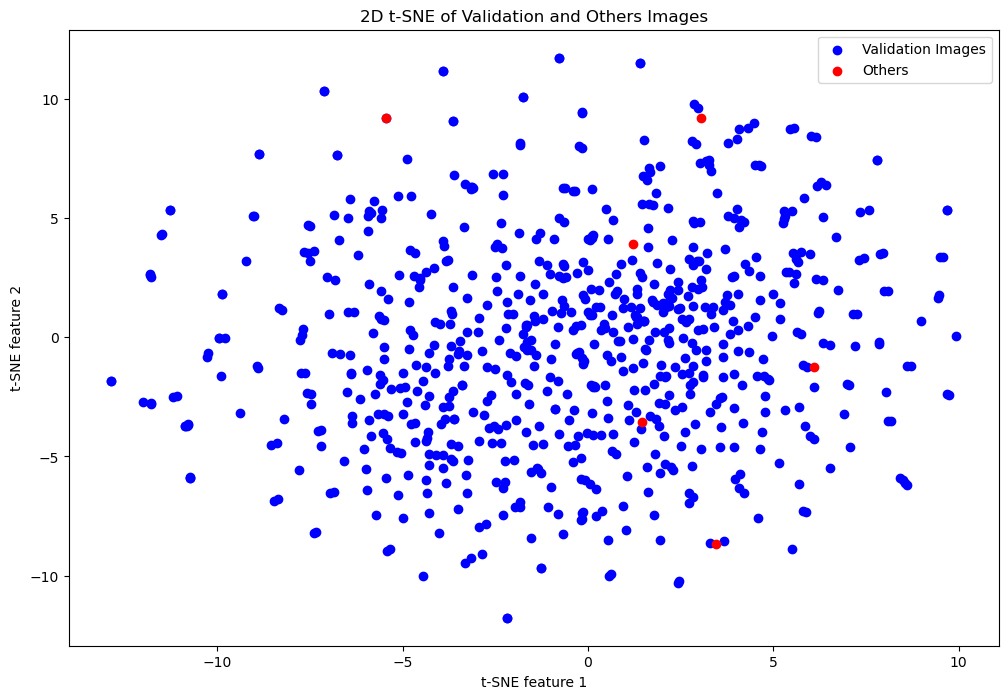

In [70]:
# Separating the two sets of features in the TSNE output

val_tsne_vgg19 = tsne_vgg19[:len(images)]

others_tsne_vgg19 = tsne_vgg19[len(images):]



# Plotting

plt.figure(figsize=(12, 8))
plt.scatter(val_tsne_vgg19[:, 0], val_tsne_vgg19[:, 1], c='blue', label='Validation Images')
plt.scatter(others_tsne_vgg19[:, 0], others_tsne_vgg19[:, 1], c='red', label='Others')
plt.legend()
plt.title('2D t-SNE of Validation and Others Images')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

In [71]:
# Apply t-SNE transformation
tsne_resnet50 = TSNE(n_components=2, random_state=8)

tsne_resnet50 = tsne_resnet50.fit_transform(features_vgg16)

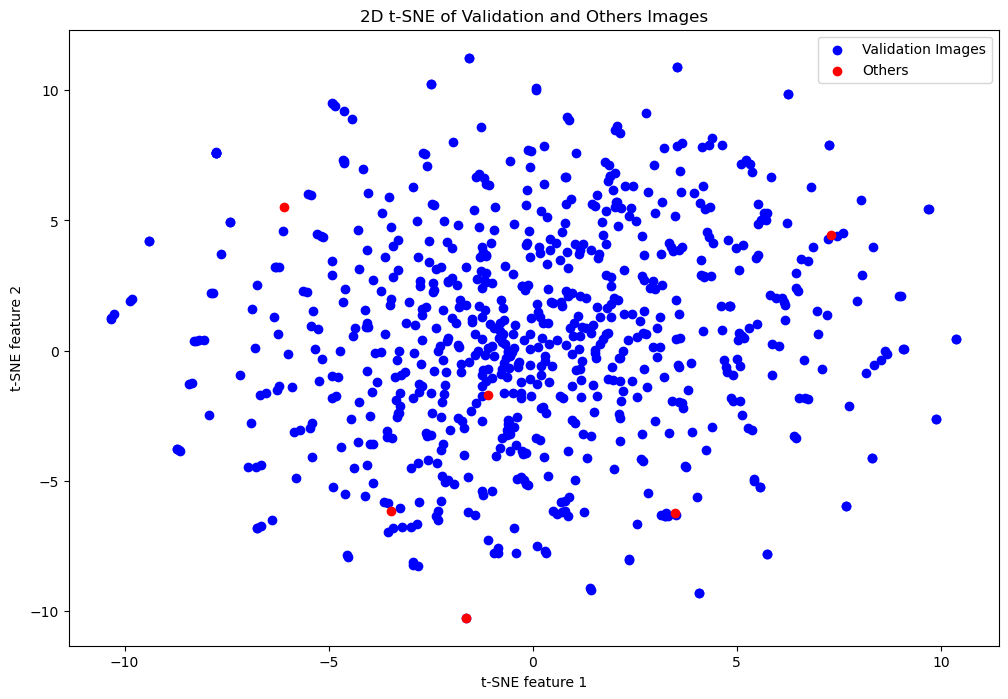

In [72]:
# Separating the two sets of features in the TSNE output

val_tsne_resnet50 = tsne_resnet50[:len(images)]

others_tsne_resnet50 = tsne_resnet50[len(images):]



# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(val_tsne_resnet50[:, 0], val_tsne_resnet50[:, 1], c='blue', label='Validation Images')
plt.scatter(others_tsne_resnet50[:, 0], others_tsne_resnet50[:, 1], c='red', label='Others')
plt.legend()
plt.title('2D t-SNE of Validation and Others Images')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

### PCA

Although useful for clustering, t-SNE does not provide a measure of explained variance like PCA (Principal Component Analysis). Since it might be useful to study the explained variance, as it can be used to understand how much information is retained in the reduced dimensions, we will complement the t-SNE analysis with a PCA analysis.

In [73]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA without reducing dimensionality
pca_custom_full = PCA().fit(features_custom_model_matrix)
pca_vgg16_full = PCA().fit(features_vgg16_matrix)
pca_vgg19_full = PCA().fit(features_vgg19_matrix)
pca_resnet50_full = PCA().fit(features_resnet50_matrix)

# Get the explained variance ratios
explained_variance_ratio_custom = pca_custom_full.explained_variance_ratio_
explained_variance_ratio_vgg16 = pca_vgg16_full.explained_variance_ratio_
explained_variance_ratio_vgg19 = pca_vgg19_full.explained_variance_ratio_
explained_variance_ratio_resnet50 = pca_resnet50_full.explained_variance_ratio_


Let's plot the cumulative explained variance of the custom CNN, VGG16, VGG19 and ResNet50 

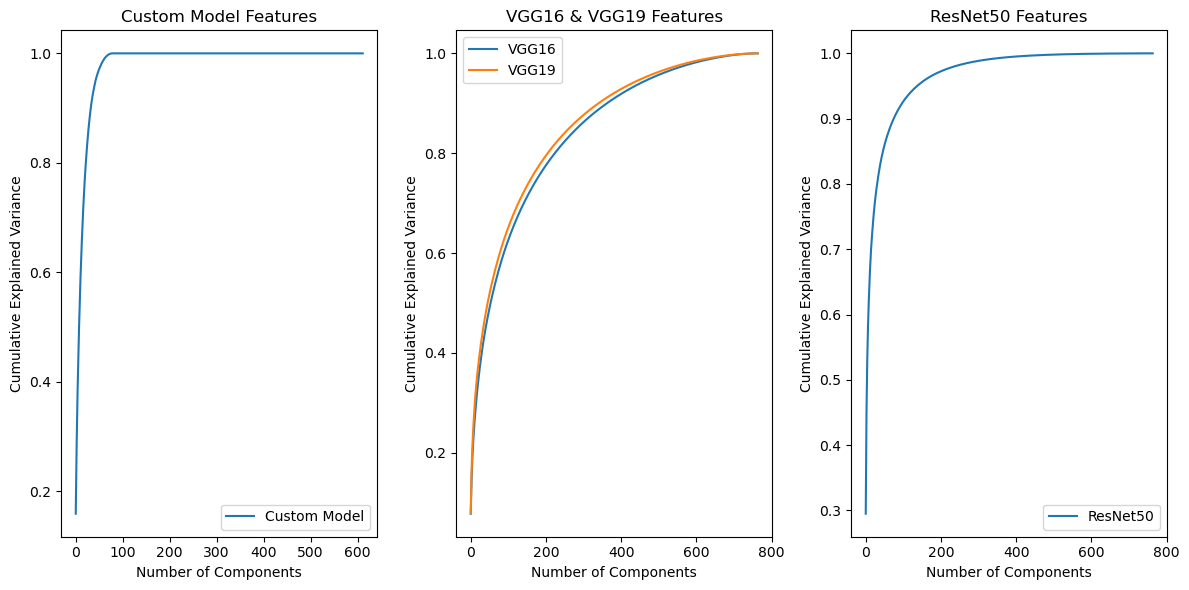

In [74]:
plt.figure(figsize=(12, 6))  # Adjust the size as needed

# Plot for custom model features
plt.subplot(1, 3, 1)  # Use a 1x3 grid, this is the first subplot
plt.plot(explained_variance_ratio_custom.cumsum(), label='Custom Model')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Custom Model Features')
plt.legend()

# Plot for VGG16 and VGG19 features overlapped
plt.subplot(1, 3, 2)  # Second subplot
plt.plot(explained_variance_ratio_vgg16.cumsum(), label='VGG16')
plt.plot(explained_variance_ratio_vgg19.cumsum(), label='VGG19')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('VGG16 & VGG19 Features')
plt.legend()

# Plot for ResNet50 features
plt.subplot(1, 3, 3)  # Third subplot
plt.plot(explained_variance_ratio_resnet50.cumsum(), label='ResNet50')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('ResNet50 Features')
plt.legend()

plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area
plt.show()


We observe that our custom model yields a more pronounced curve, with cumulative explained variance saturating around 100 number of components. ResNet50 also has a pronounced profile, but smoother, with 95% of the cumulative explained variance at 200 number of components. VGG16 and VGG19 perform worse in this sense, their respective curves being very similar smoother than ResNet50.

The especially sharp profile of our custom model can be explained by the simpler architecture of our custom CNN leading to fewer redundant features, as opposed to larger networks that might learn a lot of redundant or slightly varying features. With fewer but more distinct features, the variance explained by the initial principal components might be higher.

Let's now apply 2D PCA to our models and plot the results: 

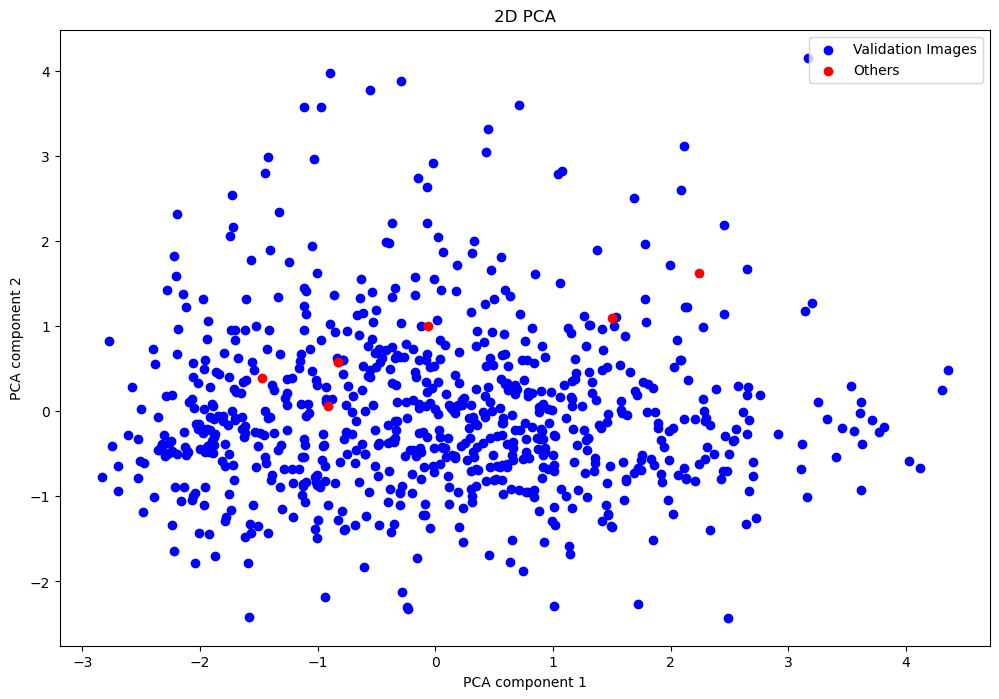

In [78]:
# Apply 2D PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_custom_model_matrix)


# Separating the two sets of features in the TSNE output

val = pca_result[:len(images)]
others = pca_result[len(images):]

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(val[:, 0], val[:, 1], c='blue', label='Validation Images')
plt.scatter(others[:, 0], others[:, 1], c='red', label='Others')
plt.legend()
plt.title('2D PCA')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.show()

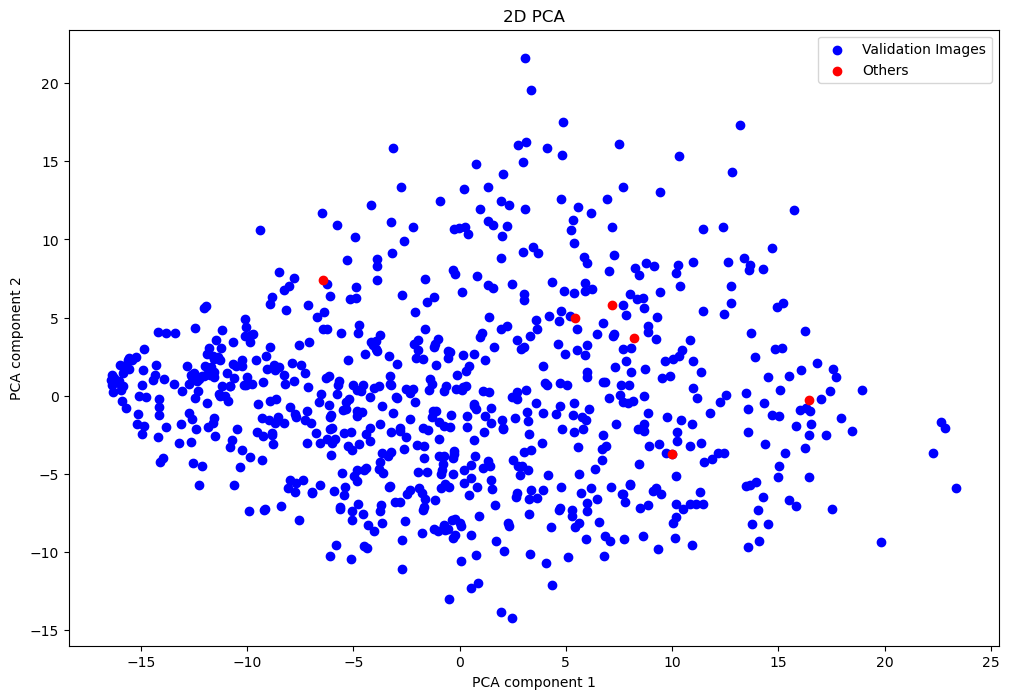

In [75]:
# Apply 2D PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_vgg16_matrix)

# Separating the two sets of features in the TSNE output
val = pca_result[:len(images)]
others = pca_result[len(images):]

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(val[:, 0], val[:, 1], c='blue', label='Validation Images')
plt.scatter(others[:, 0], others[:, 1], c='red', label='Others')
plt.legend()
plt.title('2D PCA')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.show()

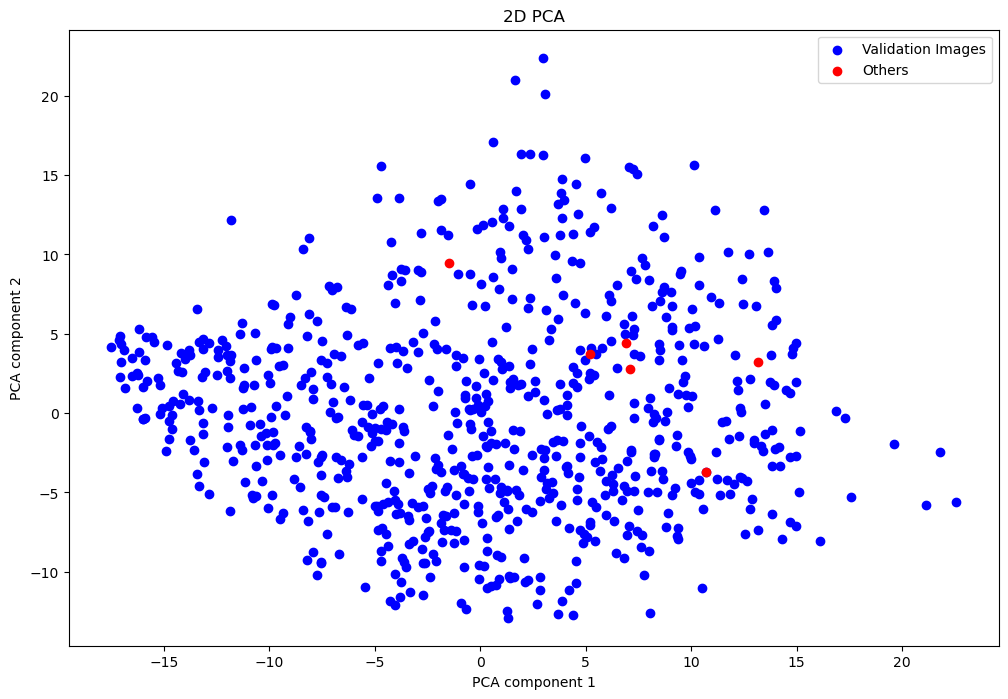

In [76]:
# Apply 2D PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_vgg19_matrix)


# Separating the two sets of features in the TSNE output

val = pca_result[:len(images)]
others = pca_result[len(images):]

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(val[:, 0], val[:, 1], c='blue', label='Validation Images')
plt.scatter(others[:, 0], others[:, 1], c='red', label='Others')
plt.legend()
plt.title('2D PCA')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.show()

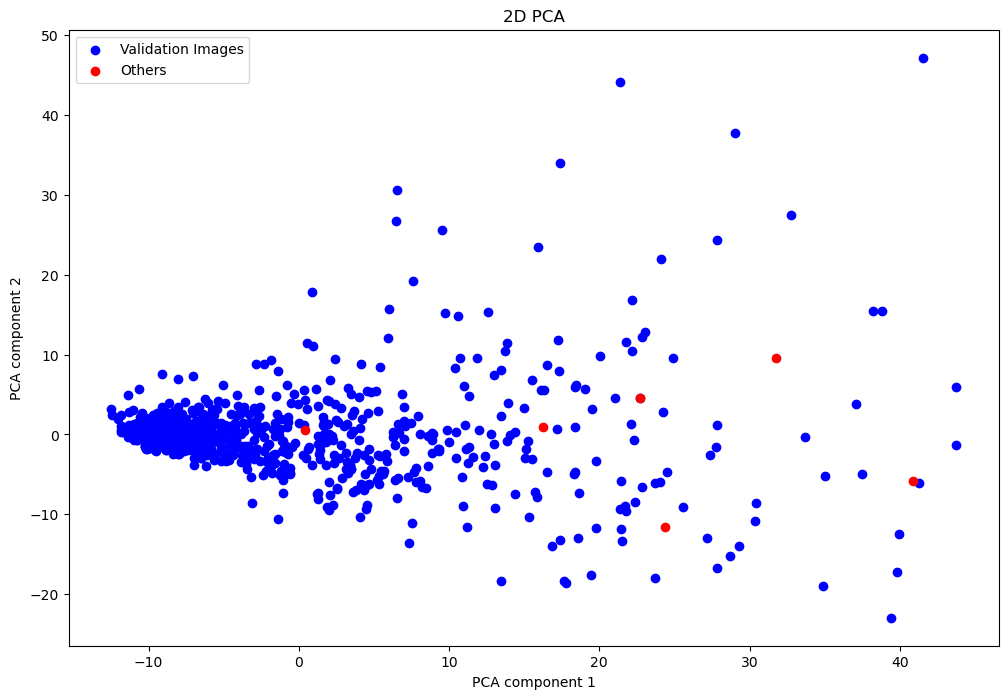

In [77]:
# Apply 2D PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_resnet50_matrix)


# Separating the two sets of features in the TSNE output

val = pca_result[:len(images)]
others = pca_result[len(images):]

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(val[:, 0], val[:, 1], c='blue', label='Validation Images')
plt.scatter(others[:, 0], others[:, 1], c='red', label='Others')
plt.legend()
plt.title('2D PCA')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.show()

We find a tendency of the point belonging to paintings by painters different from Vermeer being pushed to the edge of the respective clusters, with ResNet50 clearly performing best.